In [2]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log, dot, e
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

##### For Building the Model #####
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

The dataset may be downloaded from https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

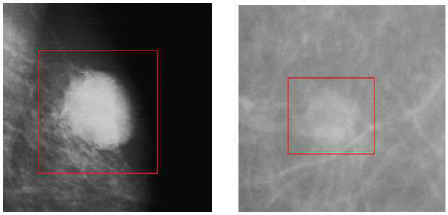

<h2>Loading and Preprocessing the Data</h2>

In [105]:
### Load the data
df = pd.read_csv("data.csv", index_col = 0)
print("Size of the data:", df.shape)
df.head()

Size of the data: (569, 32)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h3>Dropping unnecessary columns</h3>

In [106]:
df.drop(['Unnamed: 32'], axis = 1, inplace = True)
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

In [107]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [109]:
y = df.diagnosis.values
x_data = df.drop(['diagnosis'], axis = 1)
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


<h3>Data Standardization</h3>

In [111]:
x_min = np.min(x_data, axis=0)
x_max = np.max(x_data, axis=0) 
X = (x_data - x_min)/(x_max- x_min).values
X.insert(0, 'bias', [1]*len(X))
X

,bias,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
842517,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
84300903,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
84348301,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
84358402,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
926682,1,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
926954,1,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909


<h3>Splitting the Dataset</h3>

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (426, 31)
y_train size: (426,)

x_test size: (143, 31)
y_test size: (143,)


<h1>Logistic Regression Training</h1>

<h3>Computing for the probability and sigmoid functions</h3>

Screen Shot 2022-10-30 at 6.23.41 PM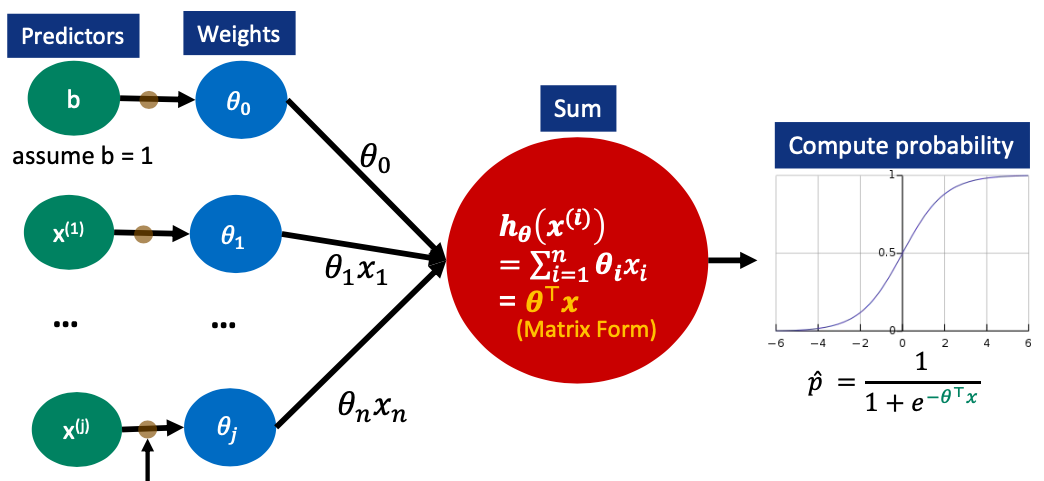

In [113]:
#note: w = theta
def sum(x, w):
    return np.dot(x, w)

def sigmoid(z):
    return 1/(1+e**(-z))

<h3>Prediction using the estimated probabilities</h3>

Screen Shot 2022-10-30 at 6.27.01 PM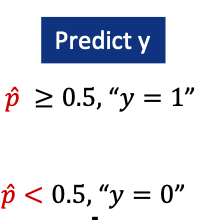

In [114]:
def predict(x, w):
    z = sum(x,w)
    p = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in p]

<h3>Calculating the Cost</h3>

Screen Shot 2022-10-30 at 10.38.15 PM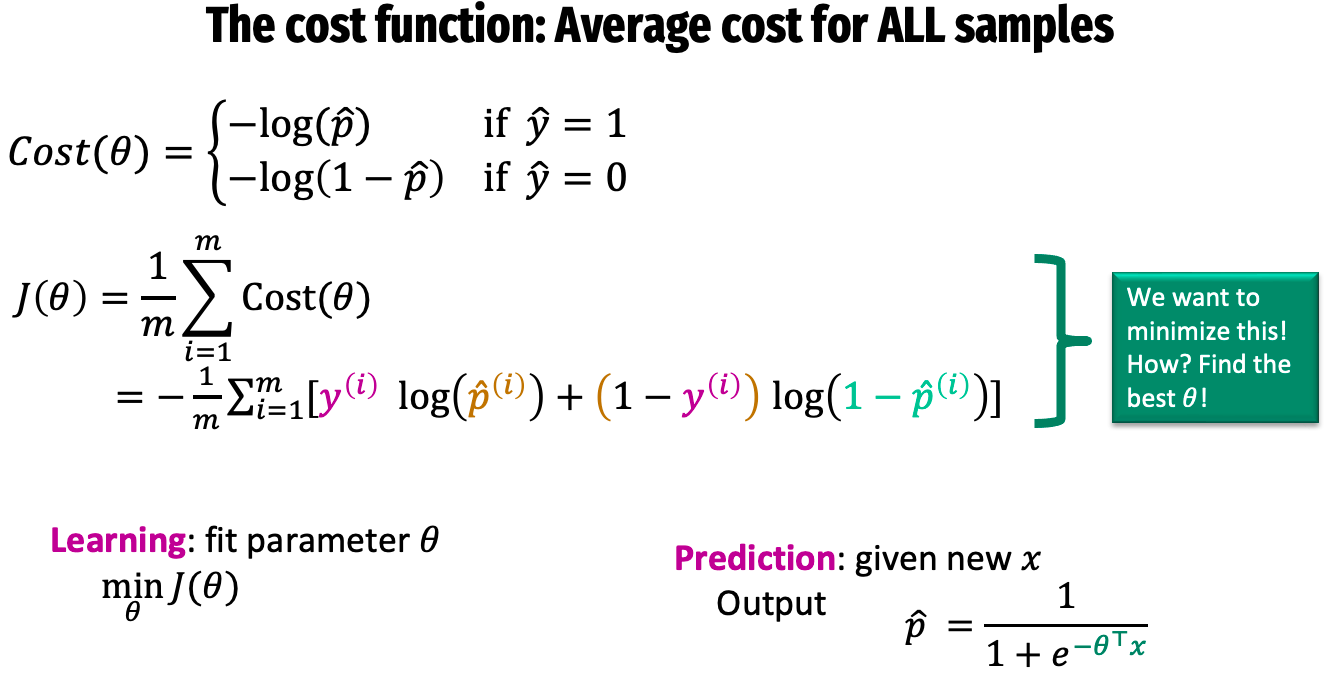

Screen Shot 2022-10-30 at 10.36.16 PM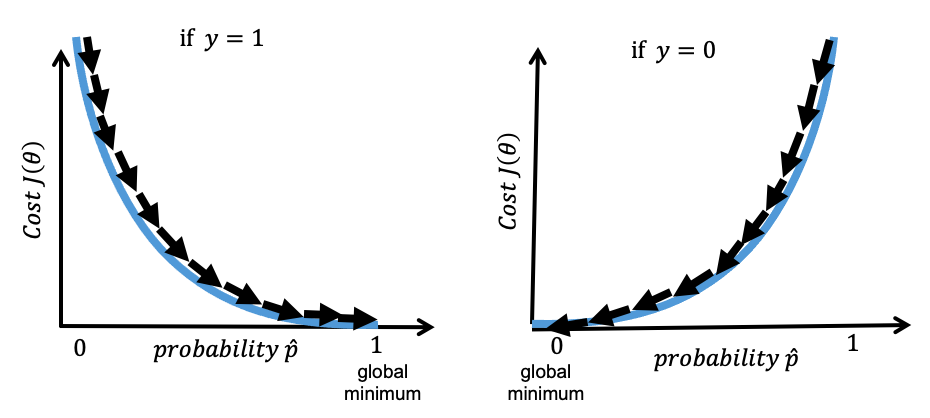

In [66]:
def calculate_cost(p, y, m):
    y_1 = y*np.log(p)
    y_0 = (1-y)*np.log(1-p)
    return -(np.sum(y_1 + y_0))/m

<h3>Computing new weights</h3>

Screen Shot 2022-10-30 at 6.33.11 PM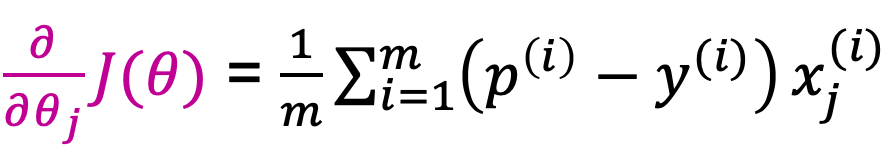

In [21]:
def compute_gradients(p, y, x):
    gradients = np.dot((p-y),x)
    return gradients

In [16]:
def evaluate_predictions(y,y_hat):
    accuracy = accuracy_score(train_pred, y_train)
    metrics = precision_recall_fscore_support(train_pred, y_train,average='macro')
    
    return np.append(accuracy,metrics)

def confusion_matrix(y,y_hat):
    cm = confusion_matrix(y_test,y_pred)
    return cm

In [25]:
# np.random.seed(0) 
# init_w = np.random.rand(30)

# init_w = np.random.uniform(0, 1, 30)

init_w = np.array([0]*31)

lr_costs = []

In [18]:
init_w.shape

(30,)

<h3>Updating of weights until we reach the number of iterations</h3>

Screen Shot 2022-10-30 at 11.02.23 PM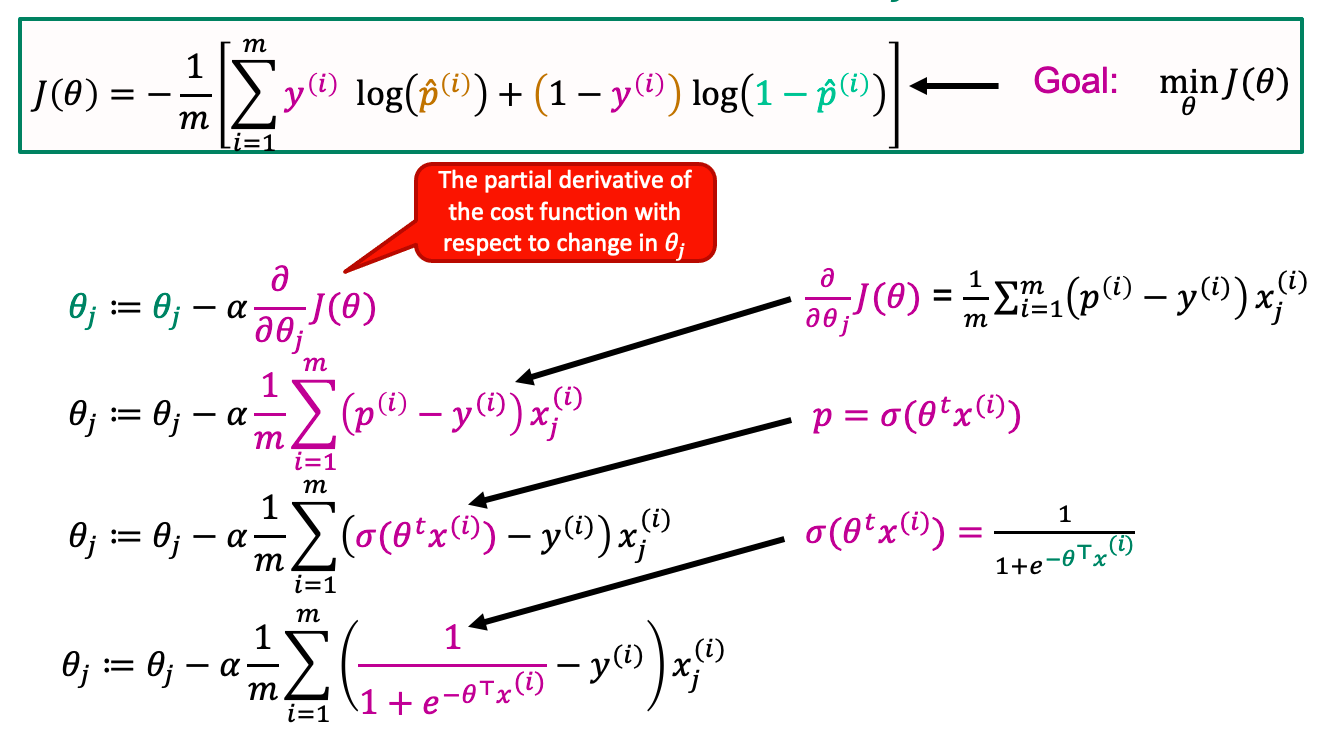

In [121]:
def grad_descent(w, x, y, iterations, lr):
    m = y.size
    costs = []
    for _ in range(iterations):
        p = sigmoid(sum(x,w))
        cost = calculate_cost(p, y, m)
        costs.append(cost)
        gradients = compute_gradients(p,y,x)
        w = w - (lr * gradients) / m
    return w, costs

In [128]:
#optimal = 10000, 0.8
w, costs = grad_descent(init_w, x_train, y_train, 1000, 0.8)
w

array([-9.02677639,  1.10633456,  2.00313381,  1.19435889,  1.69865173,
       -0.26766051,  0.42002276,  2.76753679,  3.97972481, -0.3763474 ,
       -2.35217004,  2.21882318, -0.36837935,  1.59001601,  1.54150295,
       -0.47263058, -1.47126813, -0.63312888, -0.29357613, -0.86682072,
       -1.32010733,  2.63367598,  3.15347567,  2.33079905,  2.42891291,
        1.49081379,  1.00323579,  2.11122195,  3.67811548,  1.82503116,
        0.09175537])

In [129]:
train_pred = predict(x_train,w)

In [130]:
evaluate_predictions(train_pred, y_train)

array([0.9765258215962441, 0.9709522010202154, 0.9788225124855936,
       0.974645875491013, None], dtype=object)

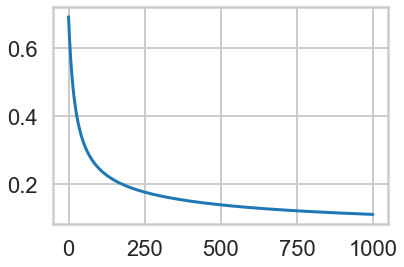

In [131]:
plt.plot(costs)

In [132]:
test_pred = predict(x_test,w)

In [133]:
accuracy_score(test_pred, y_test)

0.972027972027972

<h1>SKLEARN Implementation</h1>

In [88]:
reg = LogisticRegression().fit(x_train, y_train)

y_pred = reg.predict(x_train)
evaluate_predictions(y_pred, y_train)

array([0.9694835680751174, 0.9627574154543737, 0.9718844069837447,
       0.9669938672245169, None], dtype=object)

In [89]:
y_pred_t = reg.predict(x_test)
evaluate_predictions(y_pred_t, y_test)

array([0.9694835680751174, 0.9627574154543737, 0.9718844069837447,
       0.9669938672245169, None], dtype=object)